20153029 Minji Kim

# K-means algorithm on color image

Let $f(x)$ be a color image and $x$ be the index of image in the domain.
The values of image $f(x)$ consist of [red, green, blue] intensity.

Apply K-means algorithm to image $f(x)$ based on its color value with given number of clusters $K$ and visualize the progress of optimization and results of the algorithm for each selected number of clusters $K$.

1. Select any color image that consists of distinctive regions with different colors.
2. Apply K-means algorithm to the given image with $K=2,5,10,20$.
3. For each $K$, plot the energy curve and the result image.


## Energy

$$\frac{1}{n} \sum_{x \in \Omega} \| f(x) - m_c \|^2,$$

where $\Omega$ denotes the image domain and the number of pixels $| \Omega |$ is $n$, and $m_c$ denotes the centroid for cluster $c$ that is the cluster label of $f(x)$.

## Output Image

$$g(x) = m_c  where label(x) = c$$

Each pixel of the output image $g(x)$ should be its centroid $m_c$ where $c$ is the cluster label of $g(x)$.


## Visualization

### Input image

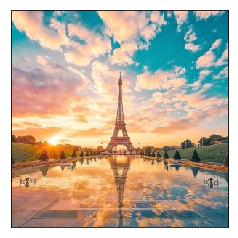

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import *
from collections import Counter
from math import sqrt

#
# load and reshape the image
#
in_img = cv2.imread('Photo.jpg')                           # img.shape = (300, 300, 3)

b, g, r = cv2.split(in_img)
img =cv2.merge([r,g,b])
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

img = cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB)
img = img.reshape((img.shape[0] * img.shape[1], 3))     # img.shape = (90000, 3)
num_image = img.shape[0]

### K = 2

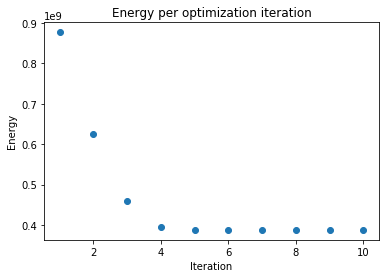

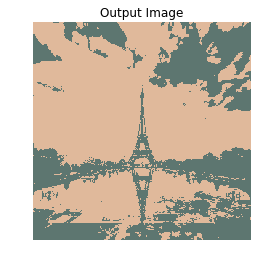

In [3]:
#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)


#
# k-mean fuction
#
def getCentroids(image, labels, k):
    idx = np.argsort(labels)
    labels = labels[idx]
    image = image[idx,:]

    label_count = [0,]
    result = Counter(labels)
    for i in range(k):
        label_count.append(result[i])
    
    label_cumsum = []
    cumsum = 0
    for i in range(k+1): 
        cumsum += label_count[i]
        label_cumsum.append(cumsum)
    centroids = np.empty((k,3), dtype=int)
    
    for i in range(k):
        centroids[i,:] = np.sum(image[label_cumsum[i]:label_cumsum[i+1],:],\
                                axis=0)/label_count[i+1]
    return centroids

def getLabelsAndEnergy(image, centroids, k):
    labels  = np.empty(num_image, dtype=int)
    energy = 0
    for i in range(num_image):
        d = []
        for j in range(k):
            d.append(distance(image[i,:], centroids[j,:]))
        labels[i] = np.argmin(d)
        energy += np.min(d)
    return labels, energy


#
# K-means clustering
#

k = 2

labels  = np.empty(num_image, dtype=int)
for i in range(num_image):
    labels[i] = randint(0,k-1)      # Initialization of label
iterations = 0
energies = []
centroids = None
oldCentroids = 0
while not np.all(oldCentroids == centroids):
    oldCentroids = centroids
    iterations += 1

    # Assign centroids based on datapoint labels
    centroids = getCentroids(img, labels, k)
        
    # Assign labels to each datapoint based on centroids and compute energies
    labels, energy = getLabelsAndEnergy(img, centroids, k)
    energies.append(energy)

# Energy Graph
x_axis = range(1,iterations+1)
y_axis = energies
plt.figure()
plt.title('Energy per optimization iteration')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.scatter(x_axis, y_axis)
plt.show()

# Output image
out_img = np.empty((num_image,3), dtype=int)
for i in range(num_image):
    out_img[i,:] = centroids[labels[i],:]     
out_img = out_img.reshape((300, 300, 3))

plt.figure()
plt.title('Output Image')
plt.imshow(out_img, cmap = plt.cm.gray)
plt.axis("off")
plt.show()



### K = 5

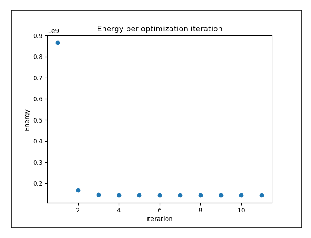

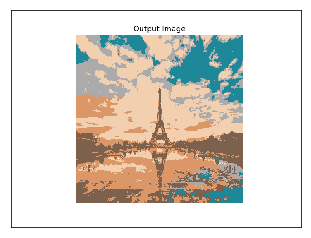

In [2]:
import matplotlib.pyplot as plt
import cv2

def image(file):
    img = cv2.imread(file)
    b, g, r = cv2.split(img)
    img =cv2.merge([r,g,b])
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
f1 = 'K5_Energy.png'
f2 = 'K5_Output_Image.png'
image(f1)
image(f2)

### K = 10

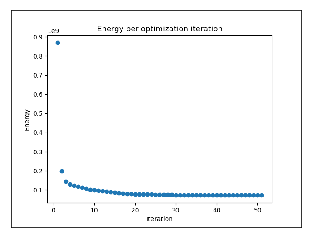

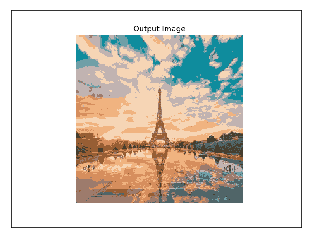

In [3]:
import matplotlib.pyplot as plt
import cv2

def image(file):
    img = cv2.imread(file)
    b, g, r = cv2.split(img)
    img =cv2.merge([r,g,b])
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
f1 = 'K10_Energy.png'
f2 = 'K10_Output_Image.png'
image(f1)
image(f2)


### K = 20

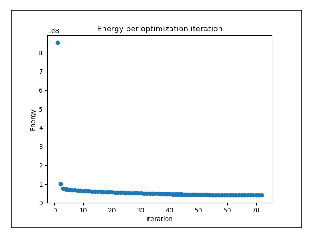

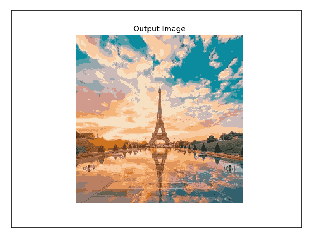

In [4]:
import matplotlib.pyplot as plt
import cv2

def image(file):
    img = cv2.imread(file)
    b, g, r = cv2.split(img)
    img =cv2.merge([r,g,b])
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
f1 = 'K20_Energy.png'
f2 = 'K20_Output_Image.png'
image(f1)
image(f2)
